# Personal Finance Tracker
##### A personal finance tracker is a tool designed to help individuals manage their finances by tracking income, expenses, and analyzing financial data.The project starts by loading a dataset that contains financial transactions, such as income and expenses, from a CSV file.The project includes steps to clean and preprocess the data, ensuring it's in a usable format.The project performs various analyses on the financial data to extract meaningful insights.The project visualizes the financial data through charts to provide a clear and intuitive understanding of the financial status.The project uses time series forecasting to predict future financial trends, helping in budget planning and financial decision-making. 

#### Data Collection
##### Pandas is a powerful library for data manipulation and analysis in Python.The data life cycle begins with the collection of raw data. In this case, the data is assumed to be already collected and stored in a CSV file named transaction1.csv.

#### Data Ingestion
##### The next step is to ingest the data into a system where it can be analyzed. The pd.read_csv(csv_file) function reads the CSV file and loads it into a pandas DataFrame, making it available for manipulation and analysis.

#### Data Inspection
##### After ingestion, it's important to inspect the data to understand its structure and contents. The df.head() function is used to display the first few rows of the DataFrame, which helps in verifying that the data has been loaded correctly and provides an initial look at the dataset.

In [ ]:
import pandas as pd

# Load the dataset from the provided CSV file
csv_file = 'transaction1.csv'
df = pd.read_csv(csv_file)

# Display the first few rows of the DataFrame
print("Loaded expense and income dataset:")
print(df.head())


In [53]:
print(df)

       type  amount       category    date  account
0    income  3000.0         salary  Jan-24  savings
1    income  1500.0      freelance  Jan-24  current
2   expense   800.0          bills  Jan-24  savings
3   expense   200.0        grocery  Jan-24  current
4   expense   100.0  miscellaneous  Jan-24  savings
5    income     NaN         salary  Feb-24  savings
6    income  1500.0     investment  Feb-24  current
7   expense   900.0          bills  Feb-24  current
8   expense   250.0        grocery  Feb-24  savings
9   expense   400.0  miscellaneous  Feb-24  current
10   income  4000.0         salary  Mar-24  savings
11   income  2000.0      freelance  Mar-24  current
12  expense  1100.0          bills  Mar-24  current
13  expense   300.0        grocery  Mar-24  savings
14  expense   500.0  miscellaneous  Mar-24  current
15   income  3800.0         salary  Apr-24  savings
16   income  1200.0         rental  Apr-24  current
17  expense     NaN          bills  Apr-24  current
18  expense 

##### Provides a summary of the dataset, which is crucial for understanding the structure, data types, and completeness of the data.
##### This method provides a concise summary of the DataFrame, including:
##### -> The number of non-null entries.
##### -> The data type of each column.
##### -> The memory usage of the DataFrame.
##### This is an essential step to understand the structure and some basic statistics of the dataset.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   type      60 non-null     object 
 1   amount    54 non-null     float64
 2   category  60 non-null     object 
 3   date      60 non-null     object 
 4   account   60 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.5+ KB


##### Offers a statistical summary, giving insights into the data distribution, central tendency, and spread. This helps in understanding the underlying patterns and characteristics of the data.
##### This method generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values. It includes metrics such as:
#####    ->Count
#####    ->Mean
#####    ->Standard Deviation
#####    ->Min, 25th percentile (Q1), Median (50th percentile), 75th percentile (Q3), and Max
##### These statistics are crucial for understanding the distribution and variability of the data.

In [57]:
df.describe()

,amount
count,54.000000
mean,1467.592593
std,1498.274398
min,100.000000
25%,400.000000
50%,925.000000
75%,1575.000000
max,5000.000000


## Handling missing values
#### Identifies the presence and extent of missing values in the dataset. Recognizing missing values is a key part of data cleaning, as these need to be handled appropriately (e.g., by imputation, removal, or other strategies) before analysis can proceed.

In [59]:
df.isnull().sum()

type        0
amount      6
category    0
date        0
account     0
dtype: int64

## Data Exploration
### Stripping Whitespace from Column Names:
#### This line ensures that any leading or trailing whitespace in the column names is removed, which helps prevent issues with column name references later on.

### Separating Expenses and Income:
#### Check ensures that the DataFrame contains a column named 'type'.Filters the DataFrame to include only rows where the 'type' column is 'expense'.Filters the DataFrame to include only rows where the 'type' column is 'income'. Separating the data into expenses and income allows for focused analysis on these subsets.

#### Calculating Mean, Median, and Mode for Expenses and then calculating Mean, Median, and Mode for Income.Calculating mean, median, and mode provides insights into the central tendencies of the data, helping to understand the distribution of expenses and income.

In [ ]:
import pandas as pd

# Load the dataset from the provided CSV file (if not already loaded)
csv_file = 'transaction1.csv'
df = pd.read_csv(csv_file)

# Check and strip any whitespace from column names
df.columns = df.columns.str.strip()

# Print columns to debug
print(df.columns)

# Separating expenses and income
if 'type' in df.columns:
    expenses = df[df['type'] == 'expense']
    income = df[df['type'] == 'income']
    
    # Calculating mean and median for expenses
    mean_expense = expenses['amount'].mean()
    median_expense = expenses['amount'].median()
    mode_expense = expenses['amount'].mode()[0]  # Mode may have multiple values, take the first one

    # Calculating mean and median for income
    mean_income = income['amount'].mean()
    median_income = income['amount'].median()
    mode_income = income['amount'].mode()[0]  # Mode may have multiple values, take the first one
   

    # Printing the results
    print(f"Mean Expense: {mean_expense}")
    print(f"Median Expense: {median_expense}")
    print(f"Mean Income: {mean_income}")
    print(f"Median Income: {median_income}")
    print(f"Mode Income: {mode_income}")
    
else:
    print("Column 'type' not found in the DataFrame.")



In [69]:
df.interpolate()

C:\Users\Admin\AppData\Local\Temp\ipykernel_22100\4002874584.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate()


,type,amount,category,date,account
0,income,3000.0,salary,Jan-24,savings
1,income,1500.0,freelance,Jan-24,current
2,expense,800.0,bills,Jan-24,savings
3,expense,200.0,grocery,Jan-24,current
4,expense,100.0,miscellaneous,Jan-24,savings
5,income,800.0,salary,Feb-24,savings
6,income,1500.0,investment,Feb-24,current
7,expense,900.0,bills,Feb-24,current
8,expense,250.0,grocery,Feb-24,savings
9,expense,400.0,miscellaneous,Feb-24,current


In [8]:
df['amount'] = df['amount'].astype(int)
print(df)

       type  amount       category    date  account
0    income    3000         salary  Jan-24  savings
1    income    1500      freelance  Jan-24  current
2   expense     800          bills  Jan-24  savings
3   expense     200        grocery  Jan-24  current
4   expense     100  miscellaneous  Jan-24  savings
5    income    3200         salary  Feb-24  savings
6    income    1500     investment  Feb-24  current
7   expense     900          bills  Feb-24  current
8   expense     250        grocery  Feb-24  savings
9   expense     400  miscellaneous  Feb-24  current
10   income    4000         salary  Mar-24  savings
11   income    2000      freelance  Mar-24  current
12  expense    1100          bills  Mar-24  current
13  expense     300        grocery  Mar-24  savings
14  expense     500  miscellaneous  Mar-24  current
15   income    3800         salary  Apr-24  savings
16   income    1200         rental  Apr-24  current
17  expense     600          bills  Apr-24  current
18  expense 

In [9]:
df['date'] = pd.to_datetime(df['date'], format='%b-%y')
monthly_summary = df.groupby([df['date'].dt.to_period('M'), 'type'])['amount'].sum().unstack().fillna(0)
print(monthly_summary)

type     expense  income
date                    
2024-01     1100    4500
2024-02     1550    4700
2024-03     1900    6000
2024-04     1000    5000
2024-05     1700    6300
2024-06     1600    5000
2024-07     1150    6000
2024-08     1950    5500
2024-09     2150    7000
2024-10     1750    5200
2024-11     1850    6100
2024-12     2300    7000


In [19]:
category_summary = df.groupby('category')['amount'].sum().sort_values(ascending=False)
print(category_summary)


category
salary           46300.0
bills             9600.0
investment        6500.0
freelance         6300.0
miscellaneous     4550.0
grocery           3800.0
rental            2200.0
Name: amount, dtype: float64


## Data Visualization
##### These visualizations are crucial for the data exploration phase as they provide insights into the data's structure, distributions, and relationships. Helps in understanding the overall financial flow over time and identifying any patterns or trends in income and expenses on a monthly basis. Provides a clear visual representation of how expenses are distributed across different categories, highlighting the major areas of spending. Gives a quick visual comparison of overall financial performance, showing whether expenses are higher or lower than income.Exporting the cleaned data ensures that the preprocessed dataset is saved and can be used for further analysis or reporting, preserving the work done during the data cleaning and exploration phases.

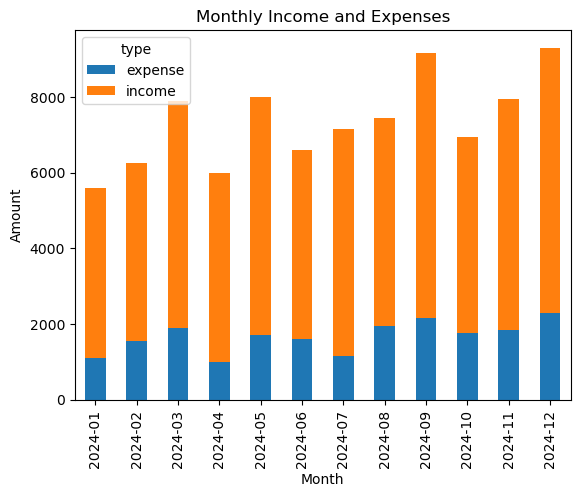

In [79]:
import matplotlib.pyplot as plt

monthly_summary.plot(kind='bar', stacked=True)
plt.title('Monthly Income and Expenses')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.show()


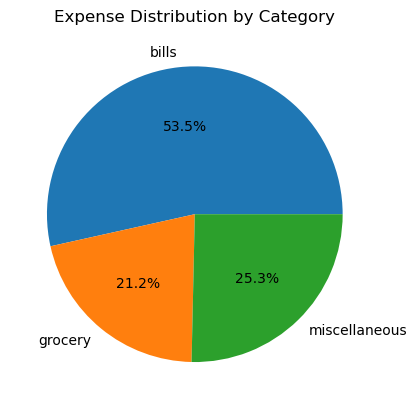

In [81]:
import seaborn as sns
expense_summary = df[df['type'] == 'expense'].groupby('category')['amount'].sum()
expense_summary.plot(kind='pie', autopct='%1.1f%%')
plt.title('Expense Distribution by Category')
plt.ylabel('')
plt.show()

Index(['type', 'amount', 'category', 'date', 'account'], dtype='object')


C:\Users\Admin\AppData\Local\Temp\ipykernel_22100\4113470775.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Total Amount', data=plot_df, palette='viridis')


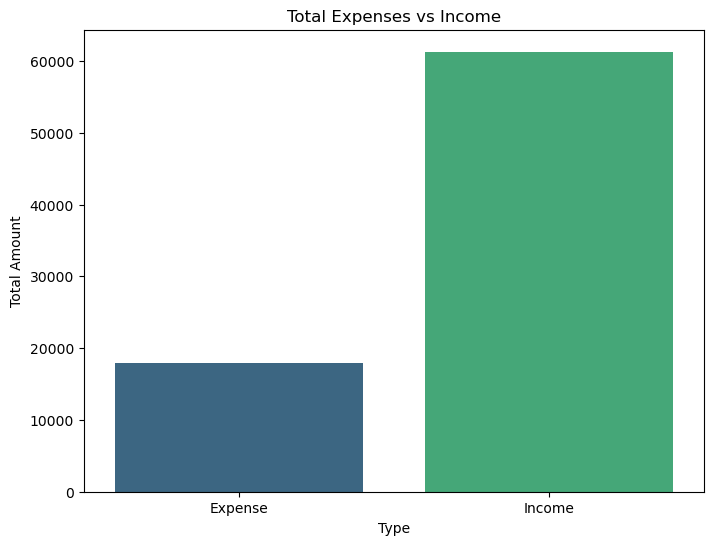

In [77]:
# Print columns to debug
print(df.columns)

# Separating expenses and income
if 'type' in df.columns:
    expenses = df[df['type'] == 'expense']
    income = df[df['type'] == 'income']
    
    # Summing the total amounts for expenses and income
    total_expense = expenses['amount'].sum()
    total_income = income['amount'].sum()
    
    # Creating a DataFrame for plotting
    data = {
        'Type': ['Expense', 'Income'],
        'Total Amount': [total_expense, total_income]
    }
    
    plot_df = pd.DataFrame(data)
    
    # Plotting
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Type', y='Total Amount', data=plot_df, palette='viridis')
    plt.title('Total Expenses vs Income')
    plt.xlabel('Type')
    plt.ylabel('Total Amount')
    plt.show()
else:
    print("Column 'type' not found in the DataFrame.")

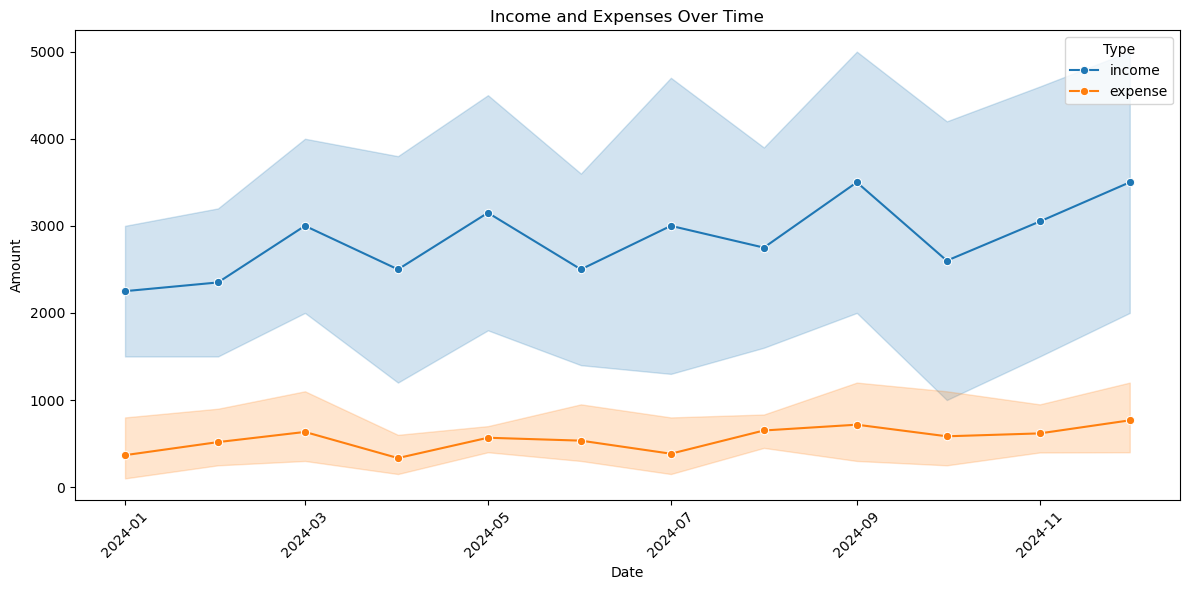

In [13]:
# Line Plot of Income and Expenses Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='amount', hue='type', marker='o')
plt.title('Income and Expenses Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


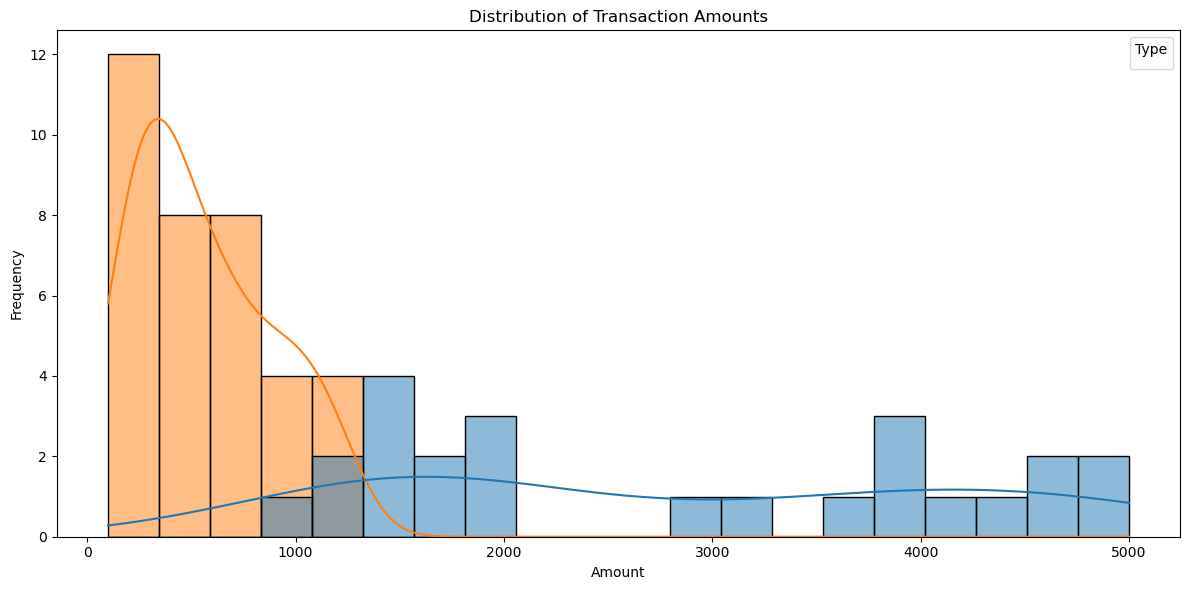

In [14]:
# Histogram of Transaction Amounts
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='amount', hue='type', bins=20, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend(title='Type')
plt.tight_layout()
plt.show()


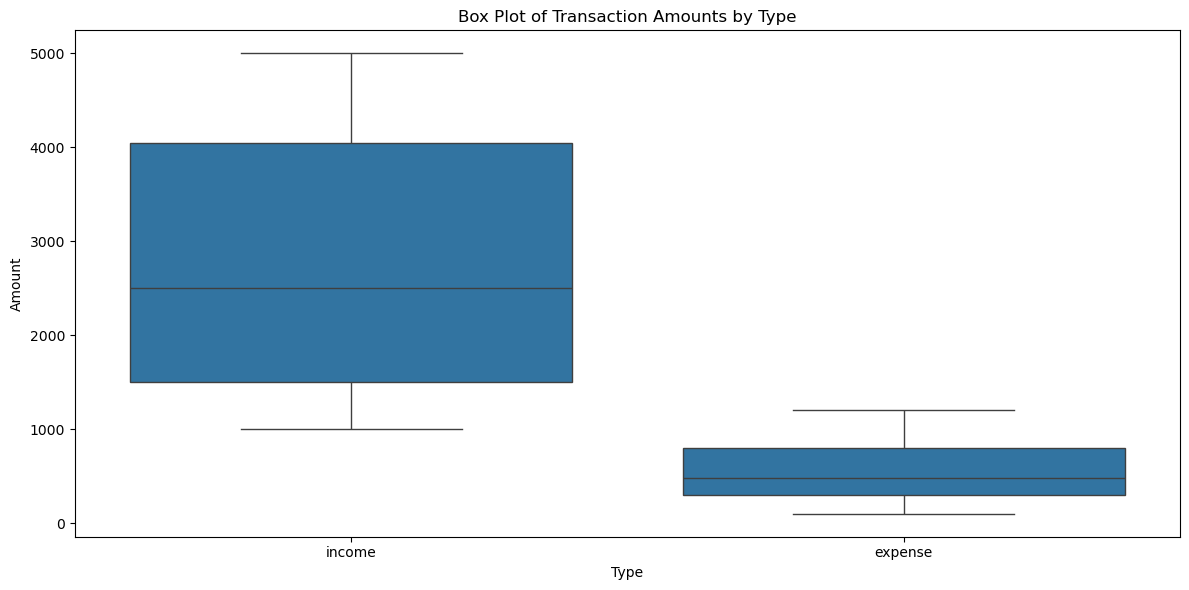

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='type', y='amount')
plt.title('Box Plot of Transaction Amounts by Type')
plt.xlabel('Type')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()


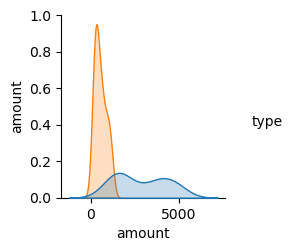

In [16]:
# Pairplot to Show Relationships
sns.pairplot(df, hue='type')
plt.show()

# Export the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_transaction.csv', index=False)

### Data Prediction
##### The provided code demonstrates how to use the Prophet library for time series forecasting. Here's a summary of the key steps:

##### Data Preparation: Create and format the DataFrame to fit Prophet's requirements.
##### Model Initialization and Fitting: Initialize a Prophet model and fit it to the historical data.
##### Future DataFrame Creation: Extend the DataFrame to include future dates for prediction.
##### Prediction and Visualization: Make predictions and visualize the results, including trend and seasonality components.
##### Prophet is particularly useful for time series data with clear trends and seasonality, making it a powerful tool for forecasting financial data,        sales, and other metrics over time.

In [17]:
!pip install prophet

23:47:47 - cmdstanpy - INFO - Chain [1] start processing
23:47:48 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Admin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


           ds        yhat  yhat_lower  yhat_upper
11 2023-11-30  820.289194  739.581181  904.793202
12 2023-12-31  840.749074  759.225203  918.711427
13 2024-01-31  861.208954  778.805158  946.518927
14 2024-02-29  880.348841  798.727717  957.253015
15 2024-03-31  900.808721  820.809279  982.133512


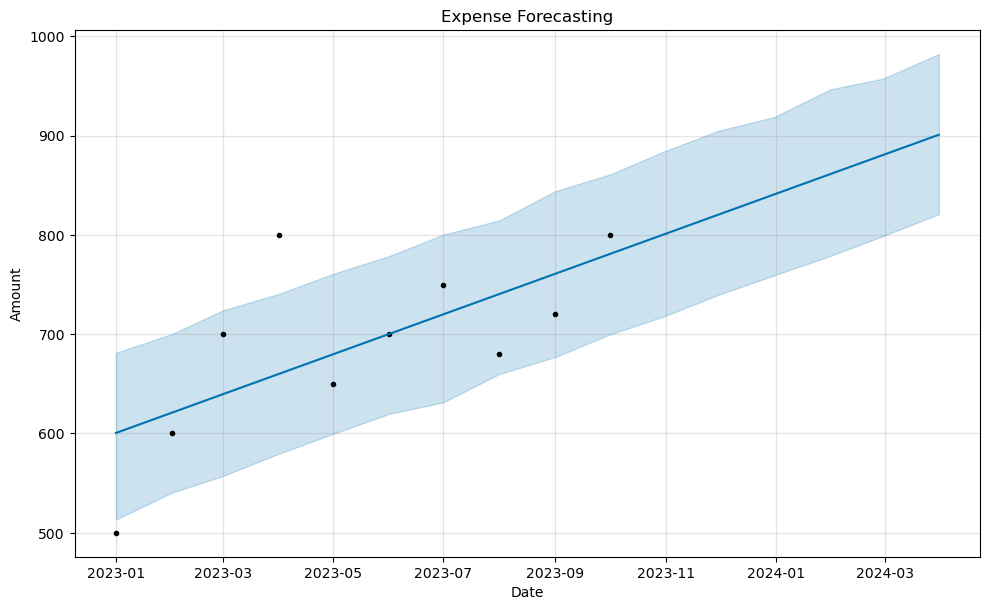

In [23]:
# Import necessary libraries

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Sample DataFrame (replace with your dataset)
data = {
    'date': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
             '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01'],
    'amount': [500, 600, 700, 800, 650, 700, 750, 680, 720, 800]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Rename columns to fit Prophet's requirement (ds and y)
df.rename(columns={'date': 'ds', 'amount': 'y'}, inplace=True)

# Convert 'ds' to datetime
df['ds'] = pd.to_datetime(df['ds'])

# Initialize a Prophet model and fit it to the data. The model learns from the historical data to make future predictions.
model = Prophet()

# Fit the model with the data
model.fit(df)

# Make a future dataframe for 6 months into the future
future = model.make_future_dataframe(periods=6, freq='M')

# Predict the future values
forecast = model.predict(future)

# Display forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot the forecast
model.plot(forecast)
plt.title('Expense Forecasting')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()


08:38:14 - cmdstanpy - INFO - Chain [1] start processing
08:38:14 - cmdstanpy - INFO - Chain [1] done processing


            ds        yhat  yhat_lower  yhat_upper
120 2023-05-01  182.170929  180.457275  183.932225
121 2023-05-02  183.821330  182.108058  185.710361
122 2023-05-03  185.249360  183.403669  186.992787
123 2023-05-04  186.677396  184.853798  188.438690
124 2023-05-05  188.105435  186.262850  189.875945
125 2023-05-06  189.533476  187.657904  191.427026
126 2023-05-07  191.188136  189.410194  192.904425
127 2023-05-08  192.687479  190.804288  194.470784
128 2023-05-09  194.337881  192.545912  196.117850
129 2023-05-10  195.765911  193.964740  197.604526


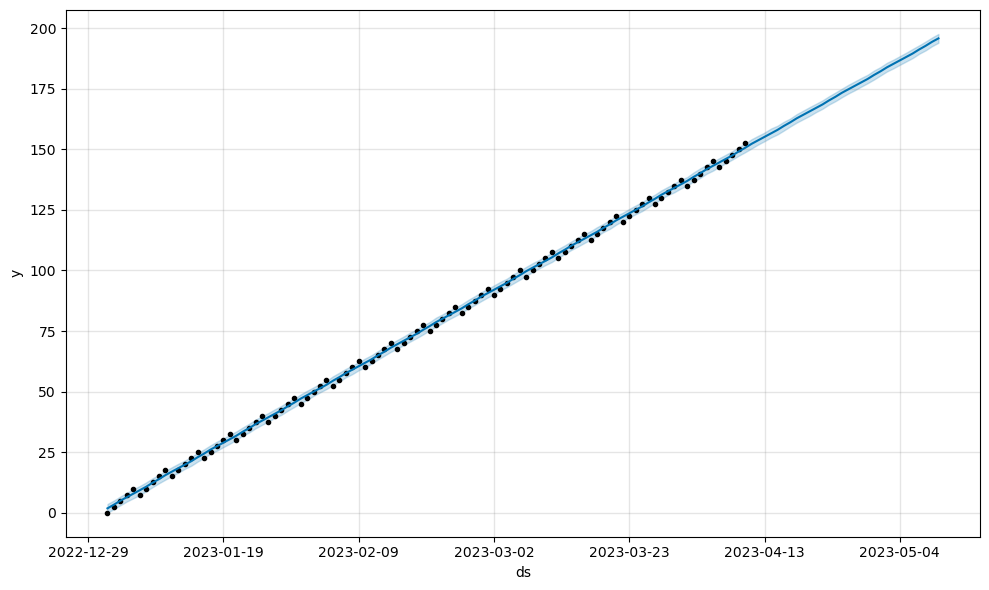

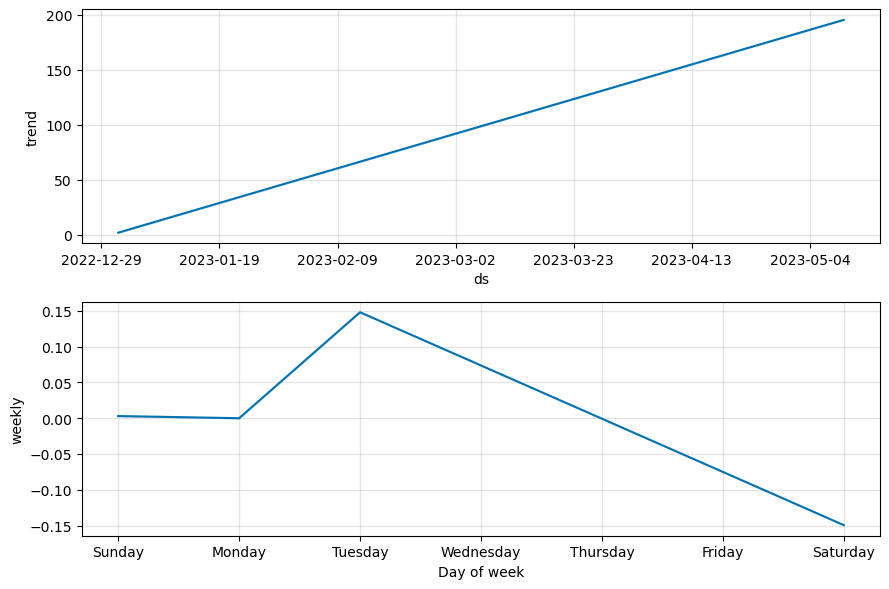

In [19]:
# Install the Prophet library
# !pip install prophet

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Sample DataFrame (replace with your dataset)
data = {
    'ds': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'y': [x * 1.5 + (x % 5) for x in range(100)]  # Some made-up time series data
}

df = pd.DataFrame(data)

# Initialize the Prophet model
model = Prophet()

# Fit the model on the dataset
model.fit(df)

# Make a future DataFrame for predictions
future = model.make_future_dataframe(periods=30)  # Forecast 30 days into the future

# Make predictions
forecast = model.predict(future)

# Display the predictions (last 10 for a better view)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

# Plot the forecast
model.plot(forecast)
plt.show()

# If you want to visualize the trend, seasonality, and other components
model.plot_components(forecast)
plt.show()